<a href="https://colab.research.google.com/github/Basit2612/Deep-Learning-with-Pytorch/blob/main/04_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Get Data

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} directory doesn't exist")
  image_path.mkdir(parents=True, exist_ok=True)

# Download the Data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading, pizza, steak, sushi data...")
  f.write(request.content)

# Unzip the file
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exists... skipping download
Downloading, pizza, steak, sushi data...
Unzipping pizza, steak, sushi data...


In [ ]:
data_path / "pizza_steak_sushi.zip"

PosixPath('data/pizza_steak_sushi.zip')

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

# Data Preparation & Exploration

In [ ]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# Visualize and Image

data/pizza_steak_sushi/train/sushi/385154.jpg
sushi
Random_image_path: data/pizza_steak_sushi/train/sushi/385154.jpg
Random_image_class: sushi
Image height: 382, Image Width: 512


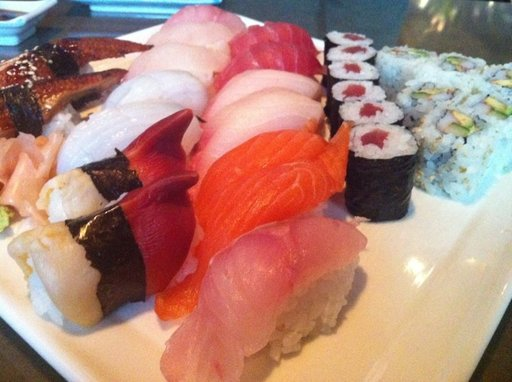

In [ ]:
import random
from PIL import Image

# random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

image = Image.open(random_image_path)
print(f"Random_image_path: {random_image_path}")
print(f"Random_image_class: {image_class}")
print(f"Image height: {image.height}, Image Width: {image.width}")
image

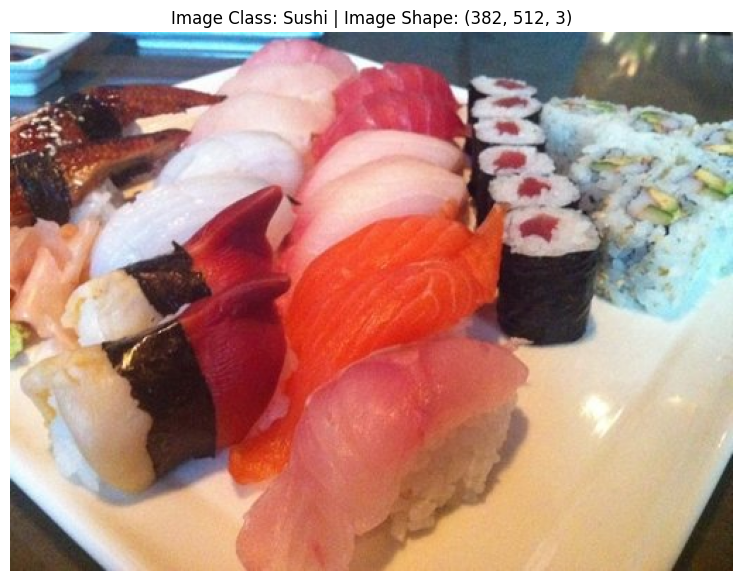

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(image)
image_as_array.shape

plt.figure(figsize=(10, 7))
plt.axis(False)
plt.title(f"Image Class: {image_class.capitalize()} | Image Shape: {image_as_array.shape}")
plt.imshow(image_as_array, cmap="gray")

array([[[141, 171, 179],
        [140, 171, 176],
        [138, 167, 173],
        ...,
        [ 26,  32,  32],
        [ 64,  70,  68],
        [114, 120, 118]],

       [[209, 242, 249],
        [211, 244, 251],
        [213, 244, 249],
        ...,
        [ 26,  32,  32],
        [ 56,  62,  62],
        [ 98, 104, 102]],

       [[208, 247, 254],
        [213, 250, 255],
        [218, 253, 255],
        ...,
        [ 51,  59,  61],
        [ 69,  77,  79],
        [100, 109, 108]],

       ...,

       [[ 77,  60,  34],
        [ 77,  60,  34],
        [ 80,  60,  35],
        ...,
        [ 49,  32,  12],
        [ 48,  30,  10],
        [ 51,  34,  14]],

       [[ 77,  57,  32],
        [ 76,  56,  31],
        [ 77,  57,  32],
        ...,
        [ 47,  29,   9],
        [ 48,  27,   8],
        [ 54,  36,  16]],

       [[ 73,  53,  28],
        [ 73,  53,  28],
        [ 74,  54,  29],
        ...,
        [ 57,  36,  17],
        [ 50,  29,  10],
        [ 55,  34,  15]]], dtype=uint8)
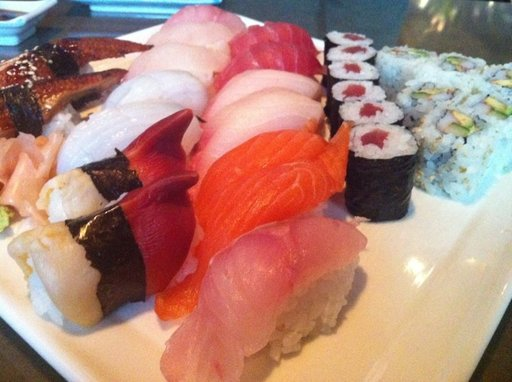

In [ ]:
image_as_array

# Transfroming Data

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(image).shape

torch.Size([3, 64, 64])

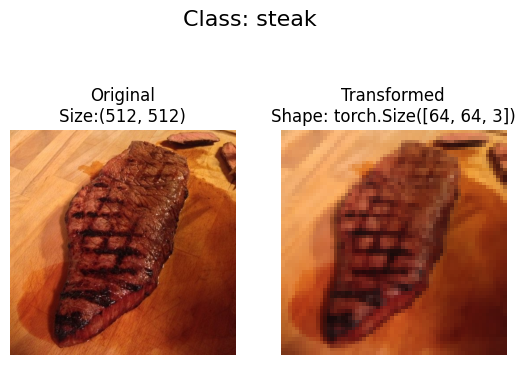

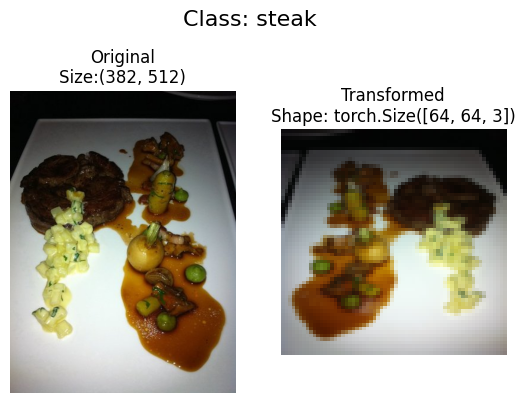

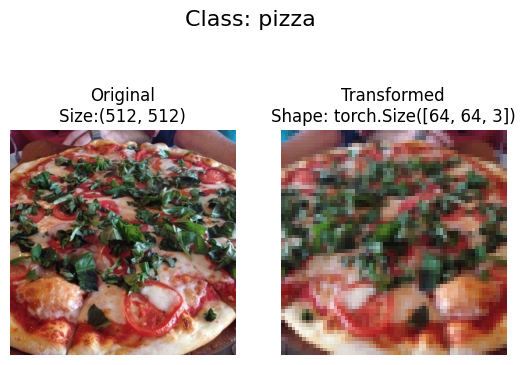

In [ ]:
def plot_transformed_images(image_path: list, transform, n=3, seed=None):
  if seed:
    random.seed(seed)
  random_image_path = random.sample(image_path, k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1, 2, 0) # (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [ ]:
random_image_path

PosixPath('data/pizza_steak_sushi/train/sushi/385154.jpg')

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

# Option 1

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #transform the data
                                  target_transform=None #transform the label/target
                                  )

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(class_names)

3

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
image, label = train_data[0][0], train_data[0][1]
image, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [ ]:
class_names[label]

'pizza'

In [ ]:
print(f"Image tensor: {image}")
print(f"Image Shape: {image.shape}")
print(f"Image Datatype: {image.dtype}")
print(f"Image Label: {class_names[label].capitalize()}")
print(f"Label Datatype: {type(label)}")

Image tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

In [ ]:
img = image.permute(1,2,0)
img.shape

torch.Size([64, 64, 3])

Matplotlib Likes coloe channels last whie tensor prints color channels first

Original Shape: torch.Size([3, 64, 64])
Image Permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

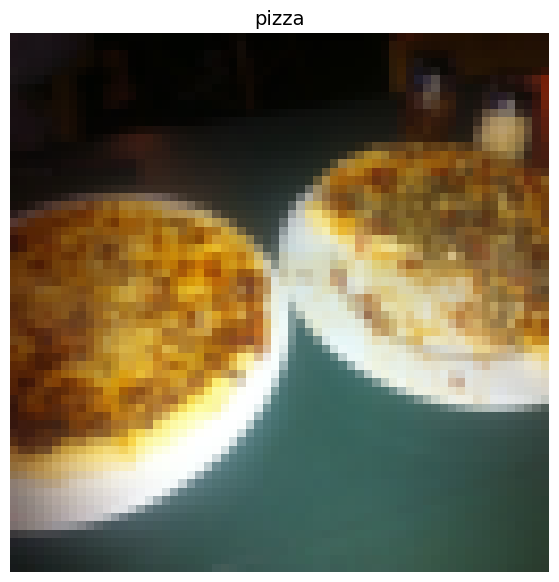

In [ ]:
print(f"Original Shape: {image.shape}")
print(f"Image Permute: {img.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis(False)
plt.title(class_names[label], fontsize= 14)

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader

BATCHSIZE= 1

train_dataloader = DataLoader(batch_size=BATCHSIZE,
                              dataset=train_data,
                              num_workers = os.cpu_count(), # Count hom many cpu your computer hardware has
                              shuffle=True)

test_dataloader = DataLoader(batch_size=BATCHSIZE,
                             dataset=test_data,
                             shuffle=False,
                             num_workers=1)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b6911a5e590>,
 <torch.utils.data.dataloader.DataLoader at 0x7b6911a5f580>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
image, label = next(iter(train_dataloader))

In [ ]:
print(f"Image Size: {image.shape}") # ->[batch_size, color_channels, height, width]
print(f"Label Shape: {label.shape}") # -> batchsize is 1

Image Size: torch.Size([1, 3, 64, 64])
Label Shape: torch.Size([1])


# Option 2
Data if ImageFolder isn't available

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
target_directory = train_dir
print(f"Target_dir: {target_directory}")
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target_dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'steak'>, <DirEntry 'pizza'>, <DirEntry 'sushi'>]

In [ ]:
classes = sorted([entry.name for entry in os.scandir(image_path) if entry.is_dir()])
classes

['test', 'train']

In [ ]:
def find_classes(directory: str):
  classes = sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()])

  if not classes:
    raise FileNotFoundError(f"Couldn't fnd any classes in {directory}...")

  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset
from pathlib import Path

# 1.Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  #2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    #3. Create class attribute
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  #4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  #5. Overwrite __len__()
  def __len__(self) -> int:
    return len(self.paths)

  #6. Overwrite __getitem__()
  def __getitem__(self, index: int):
    image = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(image), class_idx
    else:
      return image, class_idx

In [ ]:
img, label = train_data[0]

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom= ImageFolderCustom(targ_dir=test_dir,
                                    transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7b6911a8b850>,
 <__main__.ImageFolderCustom at 0x7b6911a8a3e0>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.paths[0]

PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg')

In [ ]:
len(train_data_custom) == len(train_data)

True

In [ ]:
train_data_custom.classes == train_data.classes

True

In [ ]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [ ]:
#Create a function to display random images

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int =10, # No. of images
                          display_shape: bool=True,
                          seed: int =None
                          ):
  #2. Adjust display if n is to high
  if n> 10:
    n=10
    display_shape = False
    print(f"For display, n shouldn't be bigger than 10")


  #3. Set the seed
  if seed:
    random.seed(seed)

  #4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  #5. Setup a matplotlib plot
  plt.figure(figsize=(16, 8))

  #6. Loop through random indexes
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #7. Adjust tensor dimension
    targ_image_adjust = targ_image.permute(1,2,0) # (C, H, W) -> (H, W, C)

    # Plot adjust Sample
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")

    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

In [ ]:
random.sample(range(len(train_data_custom)), k=10)

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

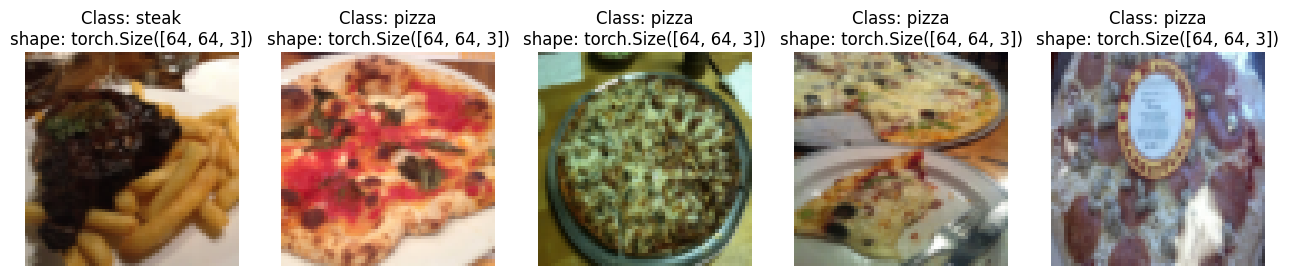

In [ ]:
# Random images from image folder
display_random_images(dataset=train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display, n shouldn't be bigger than 10


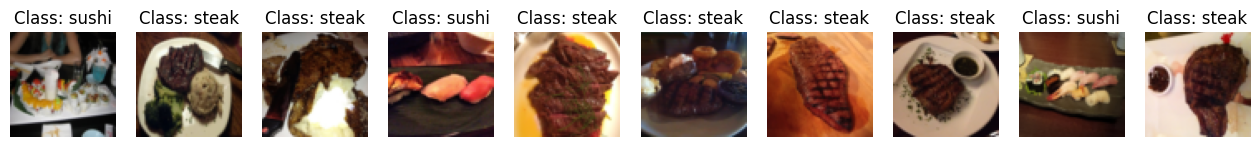

In [ ]:
# Random_image from ImageFolderCustomDataset
display_random_images(train_data_custom,
                      n=20,
                      classes = class_names,
                      seed=42)

In [ ]:
# Turn Custom loaded images into DataLoaders
from torch.utils.data import DataLoader
BATCHSIZE = 32
NUMWORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCHSIZE,
                                     shuffle=True,
                                     num_workers=NUMWORKERS)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCHSIZE,
                                    num_workers=NUMWORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7b6910d62440>,
 <torch.utils.data.dataloader.DataLoader at 0x7b6910d62ef0>)

In [ ]:
# Get image and label
image_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the Shape
image_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# Data Augmentation

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])


In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

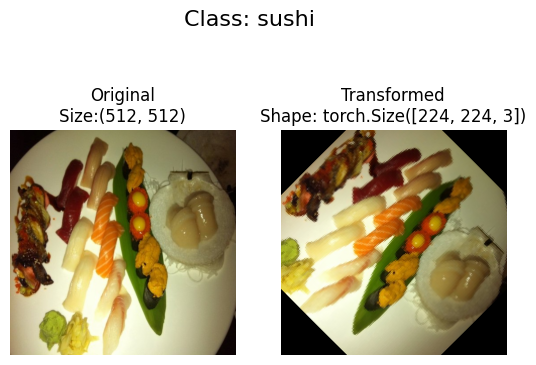

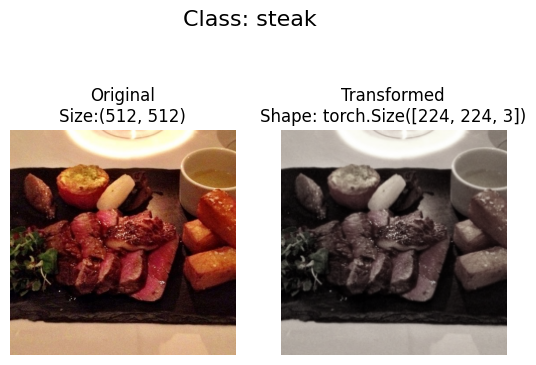

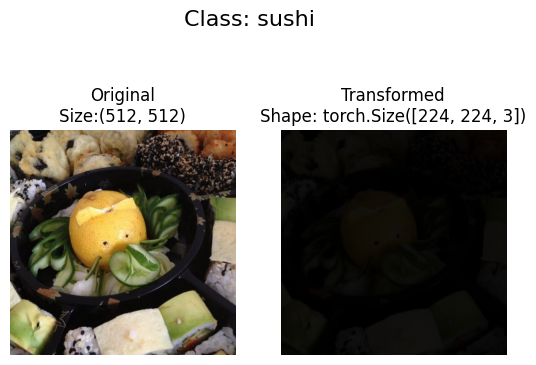

In [ ]:
plot_transformed_images(image_path=image_path_list,
                        transform= train_transform,
                        n=3)

# TinyVGG without data Augmentation

In [ ]:
# Replicate TinyVGG Architecture CNN Explainer

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
# 1. Load and transorm data with no data augmentation
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform,
                                         target_transform=None)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2.Tutn the datasets into Dataloader
import os
from torch.utils.data import DataLoader

BATCHSIZE=32

train_dataloader_simple = DataLoader(batch_size=BATCHSIZE,
                              dataset=train_data_simple,
                              shuffle=True,
                              num_workers = os.cpu_count(),
                              )

test_dataloader_simple = DataLoader(batch_size=BATCHSIZE,
                             dataset= test_data_simple,
                             shuffle=False,
                             num_workers = os.cpu_count())

train_data_simple, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
#Create TinyVGG model Class

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels = hidden_units,
                  kernel_size=1,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default size value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.layer = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features = hidden_units*13*13,
                   out_features= output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"Shape{x.shape}")
    x = self.conv_block_2(x)
    # print(f"Shape: {x.shape}")
    x = self.layer(x)
    # print(f"Shape{x.shape}")
    return x

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, #no. of color channels of image
                  hidden_units = 10,
                  output_shape=len(class_names)).to(device) # No. of outputs = pizza, steak, sushi
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# 1. Forward Pass
model_0(image_batch).to(device)

tensor([[-2.5613e-03,  2.5631e-02,  1.2241e-02],
        [-1.0889e-02,  2.6641e-02,  4.9056e-03],
        [ 4.9406e-03,  3.0522e-02,  1.5810e-02],
        [-4.0135e-03,  3.3668e-02,  7.4832e-03],
        [-1.8378e-03,  2.4265e-02,  2.6023e-03],
        [-5.0176e-03,  2.1720e-02, -5.8482e-04],
        [-3.5928e-03,  2.6169e-02,  1.2795e-02],
        [-6.4383e-03,  1.8026e-02, -2.8681e-03],
        [-9.9114e-03,  2.2257e-02, -1.8257e-03],
        [-9.5116e-03,  2.2735e-02,  9.7325e-03],
        [ 6.2595e-05,  3.2177e-02,  1.2969e-02],
        [ 2.5656e-03,  1.9607e-02,  1.0199e-03],
        [ 4.9665e-03,  2.8169e-02,  8.6763e-03],
        [ 1.4050e-03,  2.4367e-02,  1.9409e-03],
        [-5.2586e-03,  1.7705e-02, -2.5488e-03],
        [ 8.0567e-04,  2.7225e-02,  1.1011e-03],
        [-5.2579e-04,  2.9433e-02,  2.2503e-03],
        [-2.0217e-03,  2.8381e-02,  6.3472e-03],
        [-1.4911e-03,  2.5962e-02, -1.2112e-03],
        [-1.9243e-03,  3.0558e-02,  1.2645e-02],
        [-9.4778e-03

In [ ]:
try:
  import torchinfo
except:
  ! pip install torchinfo
  import torchinfo
torchinfo.__version__

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 31, 31]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           40
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 62, 62]           910
│    └─ReLU: 2-4                         [1, 10, 62, 62]           --
│    └─MaxPool2d: 2-5                    [1, 10, 31, 31]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 29, 29]           910
│    └─ReLU: 2-7                         [1, 10, 29, 29]           --
│    └─Conv2d: 2-8                       [1, 10, 27, 27]           910
│    └─ReLU: 2-9                         [1, 10, 27, 27]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequential

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, #no. of color channels of image
                  hidden_units = 10,
                  output_shape=len(train_data.classes)).to(device) # No. of outputs = pizza, steak, sushi
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# Loss and Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device= device):

    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      # 1. Forward Pass
      y_pred = model(X)

      # 2. Calculate the Loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer Step
      optimizer.step()

      # Calculate the accuracy_metrics
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              optimizer: torch.optim.Optimizer,
              loss_fn: torch.nn.Module,
              device=device):

  with torch.inference_mode():

    model.eval()
    test_acc, test_loss= 0,0

    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      # 1. Forward Pass
      test_pred_logits = model(X)

      #2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_class = torch.argmax(test_pred_logits, dim=1)
      test_acc += (test_pred_class==y).sum().item()/len(test_pred_logits)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

In [ ]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =5,
          device =device):
  results = {"Train Loss": [],
            "Train Accuracy": [],
            "Test Loss": [],
            "Test Accuracy": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)

    test_loss, test_acc = test_step(model= model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn,
                                    optimizer = optimizer,
                                    device= device)
    # Print out's what happening
    print(f"Epoch: {epoch} | Train Loss {train_loss:.4f}\tTrain Accuracy {train_acc:.2f} | Test Loss {test_loss:.4f}\tTest Accuracy {test_acc:.2f}")

    # Update results dictionary
    results["Train Loss"].append(train_loss)
    results["Train Accuracy"].append(train_acc)
    results["Test Loss"].append(test_loss)
    results["Test Accuracy"].append(test_acc)

  return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

start_time = timer()
model_0_results = train(model = model_0,
      train_dataloader = train_dataloader_simple,
      test_dataloader= test_dataloader_simple,
      optimizer = optimizer,
      loss_fn = loss_fn,
      epochs = 5,
      device = device)
end_time = timer()
total_time = end_time - start_time
print(f"Total Time: {total_time:.4f}sec")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss 1.1046	Train Accuracy 0.25 | Test Loss 1.0969	Test Accuracy 0.31
Epoch: 1 | Train Loss 1.0822	Train Accuracy 0.43 | Test Loss 1.1153	Test Accuracy 0.26
Epoch: 2 | Train Loss 1.0750	Train Accuracy 0.43 | Test Loss 1.1336	Test Accuracy 0.26
Epoch: 3 | Train Loss 1.0928	Train Accuracy 0.31 | Test Loss 1.0989	Test Accuracy 0.27
Epoch: 4 | Train Loss 1.0580	Train Accuracy 0.46 | Test Loss 1.1436	Test Accuracy 0.30
Total Time: 19.3301sec


In [ ]:
model_0_results.keys(), model_0_results.values()

(dict_keys(['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy']),
 dict_values([[1.104627087712288, 1.0822093784809113, 1.0750275179743767, 1.0928226709365845, 1.0580285042524338], [0.25, 0.42578125, 0.42578125, 0.30859375, 0.4609375], [1.0969245831171672, 1.1152780055999756, 1.1335996985435486, 1.0988951921463013, 1.1436052521069844], [0.31155303030303033, 0.2604166666666667, 0.2604166666666667, 0.2708333333333333, 0.3020833333333333]]))

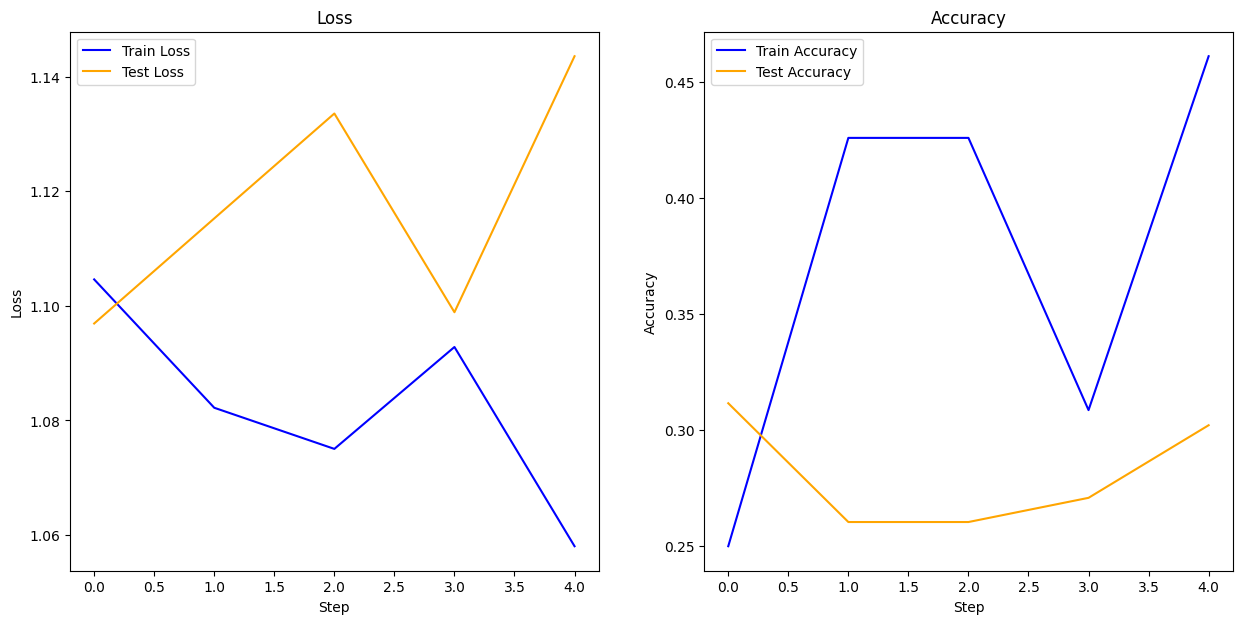

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):

  # Loss
  loss = results["Train Loss"]
  test_loss = results["Test Loss"]

  # Accuracy
  acc = results["Train Accuracy"]
  test_acc = results["Test Accuracy"]

  # Epochs
  epochs = range(len(results["Train Loss"]))
  plt.figure(figsize=(15, 7))

  # Plot the Subplot
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="Train Loss", c="Blue")
  plt.plot(epochs, test_loss, label="Test Loss", c="Orange")
  plt.xlabel("Step")
  plt.ylabel("Loss")
  plt.title("Loss")
  plt.legend()

  # PLot the Subplot
  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label="Train Accuracy", c="Blue")
  plt.plot(epochs, test_acc, label= "Test Accuracy", c="Orange")
  plt.xlabel("Step")
  plt.ylabel("Accuracy")
  plt.title("Accuracy")
  plt.legend()

plot_loss_curves(model_0_results)


Loss Curve should go down from top left to bottom right

Accuracy Curve should go up from bottom left to top right

# TinyVGG with data augmentation

In [ ]:
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
import os

train_data_augment = datasets.ImageFolder(root=train_dir,
                                          transform=train_transform_trivial,
                                          target_transform=None)

test_data_augment = datasets.ImageFolder(root=test_dir,
                                         transform=test_transform_trivial,
                                         target_transform=None)

# DataLoader
from torch.utils.data import DataLoader
torch.manual_seed(42)
train_dataloader_augment = DataLoader(dataset=train_data_augment,
                                      batch_size=32,
                                      shuffle=True,
                                      num_workers=os.cpu_count())

test_dataloader_augment = DataLoader(dataset=test_data_augment,
                                     batch_size=32,
                                     shuffle=False,
                                     num_workers = os.cpu_count())

train_data_augment, test_data_augment, train_dataloader_augment, test_dataloader_augment

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 <torch.utils.data.dataloader.DataLoader at 0x7b69108f9000>)

In [ ]:
image, label = next(iter(train_dataloader_augment))
image.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels = hidden_units,
                  kernel_size=1,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default size value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.layer = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features = hidden_units*13*13,
                   out_features= output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"Shape{x.shape}")
    x = self.conv_block_2(x)
    # print(f"Shape: {x.shape}")
    x = self.layer(x)
    # print(f"Shape{x.shape}")
    return x

model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape = len(train_data_augment.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
try:
  import torchinfo
except:
  ! pip install torchinfo
  import torchinfo
torchinfo.__version__

from torchinfo import summary
summary(model_1, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 31, 31]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           40
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 62, 62]           910
│    └─ReLU: 2-4                         [1, 10, 62, 62]           --
│    └─MaxPool2d: 2-5                    [1, 10, 31, 31]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 29, 29]           910
│    └─ReLU: 2-7                         [1, 10, 29, 29]           --
│    └─Conv2d: 2-8                       [1, 10, 27, 27]           910
│    └─ReLU: 2-9                         [1, 10, 27, 27]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequential

In [ ]:
# Loss and Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer

start_time = timer()
model_1_results = train(model = model_1,
      train_dataloader = train_dataloader_augment,
      test_dataloader= test_dataloader_augment,
      optimizer = optimizer,
      loss_fn = loss_fn,
      epochs = 5,
      device = device)
end_time = timer()
total_time = end_time - start_time
print(f"Total Time: {total_time:.4f}sec")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss 95.4129	Train Accuracy 0.32 | Test Loss 2.2266	Test Accuracy 0.26
Epoch: 1 | Train Loss 1.3678	Train Accuracy 0.30 | Test Loss 1.1816	Test Accuracy 0.20
Epoch: 2 | Train Loss 1.0959	Train Accuracy 0.29 | Test Loss 1.1723	Test Accuracy 0.26
Epoch: 3 | Train Loss 1.1087	Train Accuracy 0.30 | Test Loss 1.1598	Test Accuracy 0.26
Epoch: 4 | Train Loss 1.0902	Train Accuracy 0.43 | Test Loss 1.1565	Test Accuracy 0.26
Total Time: 10.8758sec


In [ ]:
model_1_results.keys

<function dict.keys>

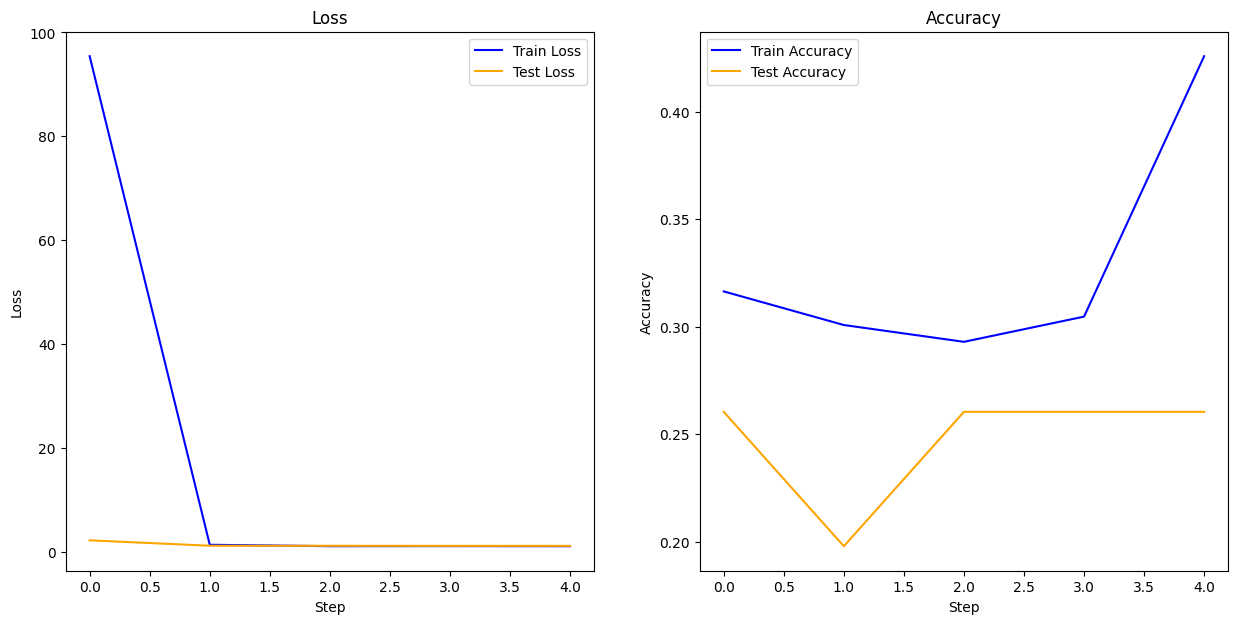

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):

  # Loss
  loss = results["Train Loss"]
  test_loss = results["Test Loss"]

  # Accuracy
  acc = results["Train Accuracy"]
  test_acc = results["Test Accuracy"]

  # Epochs
  epochs = range(len(results["Train Loss"]))
  plt.figure(figsize=(15, 7))

  # Plot the Subplot
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="Train Loss", c="Blue")
  plt.plot(epochs, test_loss, label="Test Loss", c="Orange")
  plt.xlabel("Step")
  plt.ylabel("Loss")
  plt.title("Loss")
  plt.legend()

  # PLot the Subplot
  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label="Train Accuracy", c="Blue")
  plt.plot(epochs, test_acc, label= "Test Accuracy", c="Orange")
  plt.xlabel("Step")
  plt.ylabel("Accuracy")
  plt.title("Accuracy")
  plt.legend()

plot_loss_curves(model_1_results)


In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df, model_1_df
# index = ['Model0_1', 'Model0_2', 'Model0_3', 'Model0_4', 'Model0_5', 'Model1_1', 'Model1_2', 'Model1_3',  'Model1_4', 'Model1_5']
# Results = pd.concat([model_0_df, model_1_df]).set_index(index)
# #
# # Results.set_index(index, inplace=True)
# Results

(   Train Loss  Train Accuracy  Test Loss  Test Accuracy
 0    1.104627        0.250000   1.096925       0.311553
 1    1.082209        0.425781   1.115278       0.260417
 2    1.075028        0.425781   1.133600       0.260417
 3    1.092823        0.308594   1.098895       0.270833
 4    1.058029        0.460938   1.143605       0.302083,
    Train Loss  Train Accuracy  Test Loss  Test Accuracy
 0   95.412915        0.316406   2.226623       0.260417
 1    1.367840        0.300781   1.181648       0.197917
 2    1.095932        0.292969   1.172325       0.260417
 3    1.108680        0.304688   1.159760       0.260417
 4    1.090223        0.425781   1.156544       0.260417)

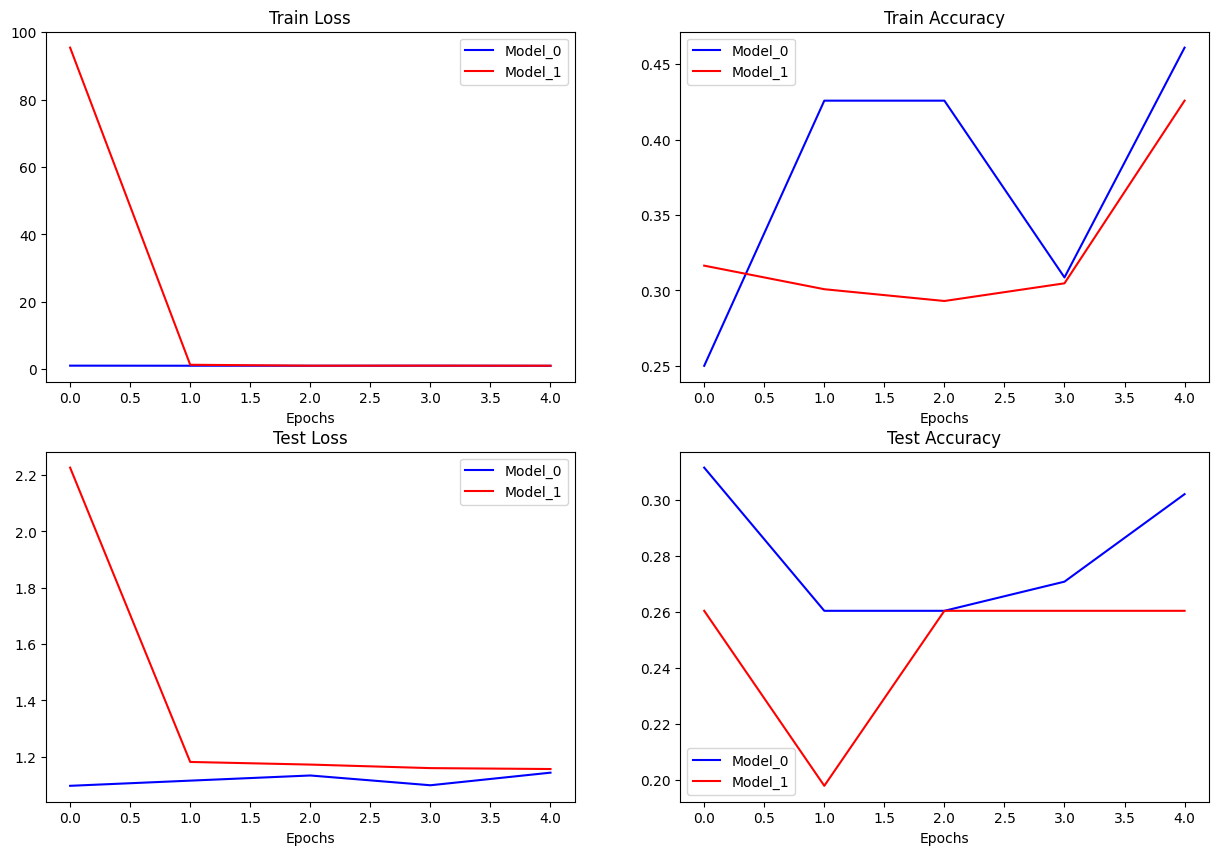

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(model_0_df))
plt.figure(figsize=(15, 10))

# Train Loss
plt.subplot(2, 2, 1)
plt.title("Train Loss")
plt.plot(epochs, model_0_results['Train Loss'], label="Model_0", c="b")
plt.plot(epochs, model_1_results['Train Loss'], label="Model_1",c='r')
plt.xlabel("Epochs")
plt.legend()

# Train Accuracy
plt.subplot(2, 2, 2)
plt.title("Train Accuracy")
plt.plot(epochs, model_0_results['Train Accuracy'], label="Model_0", c="b")
plt.plot(epochs, model_1_results['Train Accuracy'], label="Model_1", c='r')
plt.xlabel("Epochs")
plt.legend()

# Test Loss
plt.subplot(2, 2, 3)
plt.title("Test Loss")
plt.plot(epochs, model_0_results['Test Loss'], label="Model_0", c="b")
plt.plot(epochs, model_1_results['Test Loss'], label="Model_1", c='r')
plt.xlabel("Epochs")
plt.legend()

# Test Accuracy
plt.subplot(2, 2, 4)
plt.title("Test Accuracy")
plt.plot(epochs, model_0_results['Test Accuracy'], label="Model_0", c="b")
plt.plot(epochs, model_1_results['Test Accuracy'], label="Model_1", c='r')
plt.xlabel("Epochs")
plt.legend()

plt.show()

# Download a Custom Image

In [ ]:
import requests
custom_image_path = data_path / "04-pizza-dad.jpeg"

if custom_image_path.is_file():
  print("Data is already available")
else:
  with open(custom_image_path, "wb") as f:
    print("Data is downloading...")
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/04-pizza-dad.jpeg")
    f.write(request.content)

Data is already available


#Import Custom Image

In [ ]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8.shape, custom_image_uint8.dtype

(torch.Size([3, 4032, 3024]), torch.uint8)

(-0.5, 3023.5, 4031.5, -0.5)

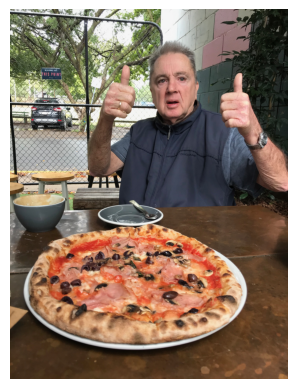

In [ ]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))
plt.axis(False)

In [ ]:
custom_image_data = torchvision.io.read_image(str(custom_image_uint8)).type(torch.float32) / 255
custom_image_data

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

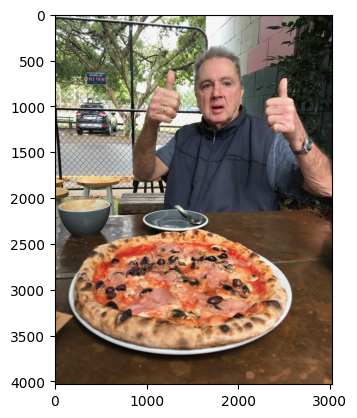

In [ ]:
plt.imshow(custom_image_data.permute(1, 2, 0))

In [ ]:
from torchvision import transforms

custom_image_resize = transforms.Compose([
    transforms.Resize(size=(64,64)),
])

custom_image_transformed = custom_image_resize(custom_image_data)
custom_image_transformed.shape

torch.Size([3, 64, 64])

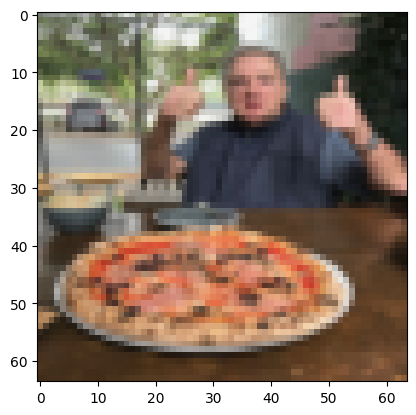

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [ ]:
custom_image_transformed.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[ 0.1465,  0.0646, -0.1485]])

In [ ]:
# Convert logits to prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3751, 0.3456, 0.2793]])

In [ ]:
#Convert prediction probabilities to prediction labels
custom_image_pred_labels = custom_image_pred_probs.argmax(dim=1).cpu()
custom_image_pred_labels

tensor([0])

In [ ]:
class_names[custom_image_pred_labels]

'pizza'

# Building a function

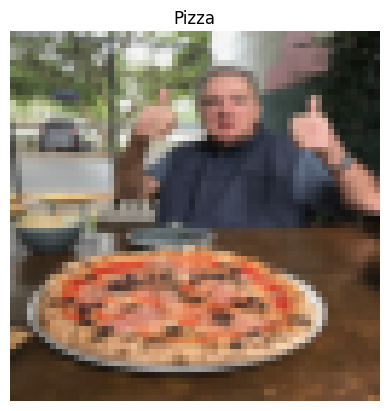

In [ ]:
def Custom_image_function(model: torch.nn.Module,
                          image_path: str,
                          class_name: List[str] = None,
                          transform=None,
                          device=device):

  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image /= 255
  if transform:
    target_image = transform(target_image)

  target_image.to(device)

  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)
    test_pred = torch.argmax(torch.softmax(model(target_image.to(device)), dim=1), dim=1)
  if class_names:
    title = class_name[test_pred.cpu()]
  else:
    title = test_pred.cpu()

  plt.imshow(target_image.squeeze().permute(1,2,0))
  plt.title(title.capitalize())
  plt.axis(False)

img = Custom_image_function(model=model_1,
                            image_path = custom_image_path,
                            class_name= class_names,
                            transform=custom_image_resize,
                            device=device)
img